# Trabalho A1

Esse relatório descreve o trabalho desenvolvido para a disciplina de Projeto e Análise de Algoritmos, ministrada pelo professor Thiago Pinheiro de Araújo, no 4º período do curso de Ciência de Dados e IA. O objetivo do trabalho é **desenvolver um DataGrid utilizando a linguagem de programação Python para recebecer, ordenar, filtrar e selecionar dados.**

O trabalho foi desenvolvido pelos seguintes alunos:

- **Almir Augusto Fonseca** (221708004)
- **Lavínia Silva Dias** (221708013)
- **George Dutra** (221708043)
- **Isabela Yabe Martinez** (221708032)

---

### Sumário:

1. Estruturação básica
2. Algoritmos de busca, ordenação e seleção
    - Algoritmos de Busca
        - Exact Search
        - Interval Search
        - Contain Search
    - Algoritmos de Ordenação
        - Insertion Sort
        - Selection Sort
        - Quick Sort
        - Merge Sort
        - Radix Sort
    - Algoritmos de Seleção
        - Ordenar e Selecionar
        - QuickSelect
        - QuickSelect com Mediana das Medianas
3. Comparação entre os algoritmos
    - Comparação de Busca
    - Comparação de Ordenação
    - Comparação de Seleção
4. Conclusão

---

## 1. Estruturação básica

O DataGrid foi desenvolvido utilizando a linguagem de programação Python, com o auxílio de algumas bibliotecas para tarefas secundárias (as quais não deveriam, necessariamente, ser implementadas pelos alunos). Abaixo, segue a lista de bibliotecas utilizadas:

 - nltk: Utilizada para gerar o conteúdo da coluna `content` nos csv's de exemplo.
 - random: Utilizada para gerar datas na coluna `creation_date`, além de ser utilizada para escolher aleatoriamente as palavras da coluna `content` e para randomizar a ordem das linhas no csv gerado.
 - string: Utilizada para gerar o conteúdo da coluna `owner_id`.
 - numpy: Utilizada para gerar o conteúdo da coluna `id`.
 - pandas: Utilizada para gerar os dados gerados em um dataframe e, posteriormente, salvá-lo em um arquivo csv. Utilizado para análise no arquivo analise_de_tempo.py.
 - datetime: Utilizado para modificar as datas na coluna `creation_date` em seu formato correto.

 Nenhuma das bibliotecas acima foi utilizada na implementação dos algoritmos avaliados, suas utilizações se restrigem à criação de novos dados para teste.


Contudo, mesmo com o auxílio de bibliotecas, o trabalho foi desenvolvido de forma a implementar os algoritmos de busca, ordenação e seleção, de forma a entender o funcionamento de cada um deles e comparar a eficiência de cada um. E para estruturar o DataGrid, foram criadas as seguintes classes:

- **Event**: classe responsável por armazenar os dados de um evento (`id`, `owner_id`, `creation_date`, `count`, `name` e `content`), representando uma linha/instância do DataGrid. Além desses campos, outra entrada foi adicionada para facilitar a implementação dos algoritmos de busca, ordenação e seleção: 
    - `timestamp`: representa o campo `creation_date` em formato de timestamp (um inteiro).
- **DataGrid**: classe principal, responsável por armazenar as instâncias dos dados e realizar as operações de exibição, inserção, deleção, busca, ordenação e seleção. Além do atributo `list` (que armazena as instâncias de `Event`), foram adicionados outros atributos para facilitar a implementação dos algoritmos de busca, ordenação e seleção:
    - `ordered_by`: aponta para o campo pelo qual a lista está ordenada (ou `None`, caso não esteja ordenada).
    - `direction`: caso a lista esteja ordenada, indica a direção da ordenação, podendo ser crescente/ascendente ("asc") ou decrescente/descendente ("desc").
    - `size`: indica o tamanho (número de instâncias) da lista.

Além disso, algumas funções auxiliares que foram criados para lidar com tarefas secundárias:

- `date_to_timestamp()`: Recebe uma string com data no formato padrão do datagrid, e retorna o timestamp equivalente;
- `string_lesser()`: Recebe duas strings, e retorna um booleano indicando se a primeira é menor que a segunda na ordem alfabética;
- `enumerated_alpha_numeric()`: Recebe um char e retorna um inteiro conforme o mapping descrito pela função (mapeamento de caracteres para ordenação alfanumérica)
- `enumerated_date()`: Recebe um char e retorna um inteiro conforme o mapping descrito pela função (mapeamento de caracteres para ordenação de datas)

Agora, tendo apresentado a estrutura básica do DataGrid, vamos apresentar e exemplificar o uso os algoritmos de busca, ordenação e seleção implementados através dos métodos da classe `DataGrid`.

---

## 2. Algoritmos de busca, ordenação e seleção

### Algoritmos de Busca

Através do método `Datagrid.search()` o usuário pode buscar por determinados Events no datagrid. Ele recebe como principais parâmetros o nome da coluna que será alvo da busca, e o valor que será procurado. Além disso, ele também possui um parâmetro opcional extra que define se deve ser usada a estratégia ótima para busca ou não. 

Como especificado, o método é separado em três abordagens diferentes de busca de acordo com a coluna em que a busca é feita:
- "ID" ou "Owner ID": Procura por um único evento que corresponda ao passado pelo usuário;
- "Creation Date" ou "Count": Procura por todos os eventos que possuam um valor pertencente ao intervalo `(start, end)` passado pelo usuário;
- "Name" ou "Content": Procura por um evento cuja string da coluna pedida contenha a string passada pelo usuário.

O método faz essa distinção automaticamente segundo a coluna passada pelo usuário, ou seja, não é possível fazer uma busca de uma abordagem não atrelada à coluna passada. 

A responsabilidade do método principal `search` é apenas verificar qual coluna foi passada, e chamar um método privado auxiliar que retornará os índices que atendem à busca. Com os índices em mãos, é criado um novo DataGrid onde se insere os eventos encontrados, e o retorna ao usuário. A decisão de retornar um DataGrid foi feita pensando em praticidade, como a possibilidade de reutilizar métodos como `show()`, `copy()`, entre outros.

A seguir, façamos uma análise aprofundada em cada método auxiliar de `search`.

#### Exact Search

Caso o usuário solicite uma busca nas colunas "ID" ou "Owner ID", é chamado o método auxiliar `Datagrid.__exact_search()`. Sua primeira ação é decidir qual estratégia abordar para a busca: 

- Caso o DataGrid esteja ordenado pela coluna em que a busca está sendo realizada (e o parâmetro `optimal` seja verdadeiro), é chamado o método auxiliar `Datagrid.__binary_exact_search()` para otimizar a busca, implementando um algoritmo de busca binária. Este algoritmo começa se adaptando a quatro cenários possíveis:
    - Caso a ordenação seja em ordem crescente, é implementada uma busca binária padrão, que procura pelo elemento no meio da lista e, caso não encontre, continue a busca na metade **direita** se o valor desejado for maior, ou na metade **esquerda** se for menor;
    - Caso a ordenação seja em ordem decrescente, é necessário inverter a lógica da busca binária. Ela passará a continuar a busca na metade direita se o valor desejado for **menor**, e na metade esquerda se for **maior**;
    - Caso a busca seja na coluna "ID", a comparação é feita com números, portanto é utilizada a comparação aritmética simples;
    - Caso a busca seja na coluna "Owner ID", a comparação é feita com caracteres alfanuméricos, portanto é utilizada a função auxiliar `string_lesser()`.

    Uma vez adaptada, a busca binária é realizada e é retornado um inteiro representando o primeiro índice em que foi encontrado um Event correspondente, ou `None` caso não encontre;
- Caso não haja ordenação o algoritmo aplica uma busca linear simples, verificando um a um os elementos da lista, e retornando o índice do primeiro correspondente que for encontrado, ou `None` caso não encontre nenhum.

#### Interval Search

Caso o usuário solicite uma busca nas colunas "Creation Date" ou "Count", é chamado o método auxiliar `Datagrid.__interval_search()`. Diferente das outras abordagens a busca por intervalos não recebe no parâmetro `value` um valor único, mas uma tupla com dois valores, sendo o primeiro o início do intervalo e o segundo o final. O algoritmo não retornará nenhum evento caso o intervalo seja inválido. No início do algoritmo, caso a busca seja pela coluna "Creation Date", o alvo (e os valores passados pelo usuário) são traduzidos para timestamp através da função auxiliar `date_to_timestamp()`, pois dessa forma não é necessário adaptar o algoritmo para lidar com strings.

A busca também se divide em duas estratégias: 

- Caso o DataGrid esteja ordenado pela coluna em que a busca está sendo realizada (e o parâmetro `optimal` seja verdadeiro), é chamado o método auxiliar `Datagrid.__binary_interval_search()` para otimizar a busca, implementando um algoritmo de busca binária. Diferente do anterior, esse algoritmo realiza duas buscas binárias; uma para encontrar o elemento mais próximo do início do intervalo, e uma para encontrar o mais próximo do final. Apesar de parecer ineficiente, perceba que assintoticamente isso equivale a uma complexidade de $O(2\log n)$, que ainda é melhor que a busca linear. 

    O algoritmo se divide ainda em mais duas possibilidades: a ordenação crescente ou decrescente. Infelizmente muitas coisas mudam ao longo do código em cada caso, portanto acaba sendo mais prático dividi-lo em dois grandes `if`'s. Ao final, o algoritmo retorna uma lista contendo todos os índices entre o início e o fim do intervalo de pertencimento (vazia se não existirem);

- Caso não haja ordenação o algoritmo aplica uma busca linear simples, verificando um a um se os elementos da lista pertencem ao intervalo, e retornando uma lista com o índice de todos que pertencem (vazia se não existir nenhum).

#### Contain Search

Caso o usuário solicite uma busca nas colunas "Name" ou "Content", é chamado o método auxiliar `Datagrid.__contain_search()`. Esta busca é a única que não é beneficiada pela busca binária, pois a letra do início de uma string não altera a possibilidade dela conter a string procurada. Portanto a estratégia escolhida é a busca linear, iterando sobre cada Event no DataGrid e verificando se sua respectiva string contém a string alvo com o método auxiliar `DataGrid.__contain()`. Este método recebe duas strings, e retorna um booleano correspondendo à primeira conter ou não a segunda. Como foi utilizada uma abordagem mais "crua" para a iteração das strings, tratando-as como arrays de caracteres ao invés de utilizar a sintaxe inteligente de python, é necessário saber o tamanho delas. O método `__contain` recebe o tamanho da segunda como parâmetro para não ser necessário calcular o tamanho dela várias vezes, afinal ela é fixa ao longo do algoritmo, enquanto o tamanho da primeira varia e por isso é calculado em cada comparação.

Perceba que este método sempre itera sobre todo o DataGrid, pois ele retorna todos os Events que contêm a string passada. Ao final, ele retorna uma lista com os índices dos eventos correspondentes.

---

### Algoritmos de Ordenação

#### Insertion Sort

O algoritmo Insertion Sort apresenta uma abordagem diferente para a ordenação, com uma complexidade de $O(n^2)$ no pior caso. Sua lógica de ordenação é baseada em construir a lista ordenada um item de cada vez. Aqui está uma descrição detalhada do algoritmo:

    Percorre a lista da esquerda para a direita, iniciando a partir do segundo elemento.
        Para cada elemento, compara-o com os elementos anteriores na lista ordenada.
        Move o elemento atual para a posição correta na lista ordenada, deslocando os elementos maiores para abrir espaço.
    Repete esse processo até que todos os elementos estejam na posição correta.

A complexidade do algoritmo é determinada pelo número de comparações e trocas realizadas durante o processo de ordenação, sendo quadrática para casos médios e piores.

O algoritmo é influenciado pela ordem inicial dos dados. Quando os dados estão quase ou completamente ordenados, a complexidade se aproxima de O(n), tornando o Insertion Sort mais eficiente em cenários específicos. Alteramos o algoritmo para verificar se a ordenação pedida é o melhor caso, verificando se a coluna já está ordenada.

Apesar de sua aparente simplicidade, o Insertion Sort é eficiente em listas pequenas e em casos em que a maioria dos elementos já está ordenada, tornando-o uma escolha prática em situações específicas.

O Insertion Sort é um algoritmo de ordenação in-place, o que significa que ele não requer memória adicional para criar novas listas durante o processo de ordenação. No entanto, sua complexidade no pior caso é quadrática, o que pode torná-lo menos eficiente em listas muito grandes.

O Insertion Sort é estável, mantendo a ordem relativa de elementos iguais, e pode ser uma escolha razoável quando a eficiência em espaço é uma preocupação e a lista é pequena o suficiente para compensar sua complexidade quadrática.

Colocamos uma opção de otimização para esse algoritmo, que veriica se o datagrid está ordenado, caso esteja, nada é feito.

#### Selection Sort

O algoritmo Selection Sort possui uma complexidade média de O(n^2). Sua abordagem se baseia na estratégia de selecionar repetidamente o menor elemento da lista não ordenada e trocá-lo com o primeiro elemento não ordenado. O algoritmo segue a seguinte sequência de ações:

    Itera sobre a lista e seleciona o menor elemento não ordenado.
    Troca o menor elemento com o primeiro elemento não ordenado.
    Repete o processo para o restante da lista não ordenada.

A função `selection_sort` é a responsável pela ordenação. O algoritmo continua selecionando e trocando elementos até que toda a lista esteja ordenada.

A complexidade do Selection Sort é determinada principalmente pelo número de comparações e trocas realizadas. Em todos os casos, o número de comparações é aproximadamente $n^2$/2 e o número de trocas é O(n).

O melhor caso ocorre quando a lista já está ordenada, mas mesmo assim, o algoritmo realiza comparações. O pior caso e o caso médio têm complexidade O($n^2$), tornando o Selection Sort menos eficiente em comparação com outros algoritmos de ordenação, como o Quick Sort.

O algoritmo é in-place, o que significa que não requer memória adicional além daquela utilizada para armazenar a lista. No entanto, não é um algoritmo estável, o que implica que a ordem relativa de elementos iguais pode ser alterada durante o processo de ordenação.

Apesar de sua simplicidade, o Selection Sort não é a escolha mais eficiente para conjuntos de dados grandes devido à sua alta complexidade quadrática. 

No selection sort a opção de otimização é acrescentar um max_index, assim quando trocamos o menor elemento da lista para o local correto, também trocamos o maior elemento da lista para o local correto, diminuindo o tempo de execução.

#### Quick Sort

O algoritmo Quick Sort possui uma complexidade média de $O(n \log n)$. Sua abordagem se baseia na estratégia de dividir para conquistar, onde a lista é dividida em partições menores e ordenadas individualmente. O algoritmo segue a seguinte sequência de ações:

    Seleciona o último elemento da lista como pivô. Neste caso, o pivô é escolhido a partir do campo especificado pelo argumento `column`.
    Rearranja os elementos da lista de modo que os elementos menores que o pivô estejam à esquerda e os elementos maiores à direita. A função `partition` é responsável por essa etapa.
    Aplica recursivamente o Quick Sort às sub-listas geradas pelo particionamento até que as sub-listas tenham tamanho zero ou um.

A função `quick_sort_recursive` é a responsável pela chamada recursiva. Essa recursividade divide a lista original em partições menores até que cada partição tenha apenas um elemento, o que, por definição, já está ordenado.

A complexidade do Quick Sort é determinada pela altura da árvore de recursão e pelo número de comparações realizadas durante o particionamento. A fase de particionamento tem complexidade \(O(n)\), e a altura da árvore de recursão é \(O(\log n)\). Assim, a complexidade média é \(O(n \log n)\), tornando o Quick Sort eficiente para muitos conjuntos de dados.

O algoritmo é influenciado pelo pivô escolhido. No pior caso, quando o pivô divide a lista de forma desigual, a complexidade pode chegar a \(O(n^2)\).

O Quick Sort é in-place, o que significa que a lista é ordenada sem a necessidade de alocação de memória adicional. No entanto, não é um algoritmo estável, o que significa que a ordem relativa de elementos iguais pode ser alterada.

O Quick Sort é especialmente eficiente em situações onde o conjunto de dados já está parcialmente ordenado, o que minimiza o número de comparações necessárias.

#### Merge Sort

O algoritmo Merge Sort possui complexidade $O(n \log n)$ no pior caso. Sua abordagem consiste em dividir o problema de ordenação em "problemas menores". O algoritmo obedece à seguinte sequência de ações: 

    Utiliza os índices `start` e `end` para separar a lista em duas, uma do início até a metade, e uma da metade ao final.
    Se as metades têm tamanho maior que 1, chama recursivamente o Merge Sort para elas. 
    Cria uma nova lista com o tamanho das duas metades somadas.
    Enquanto uma das listas não acabar:
        Compara o primeiro elemento das duas:
            Insere o menor dos dois na nova lista, "removendo-o" da respectiva metade.
    Insere sequencialmente o resto dos elementos da metade que restou no fim da nova lista, pois já estão ordenados.
    Retorna a lista ordenada.

Por ser recursivo, o algoritmo recebe não só os parâmetros de qual coluna ordenar e em qual ordem, mas também dois parâmetros que indicam o início e o fim do intervalo que será ordenado. O caso base do algoritmo é ter uma lista de um elemento só, pois dessa forma ela já está ordenada e é retornada como está. A abordagem do algoritmo tem uma proposta semelhante à uma árvore, e daí vem sua complexidade: A primeira etapa de recursão tem complexidade $O(\log n)$, pois essa é a altura da "árvore", e a segunda etapa de mesclar as duas metades ordenadas tem complexidade $O(n)$, pois é feita a inserção dos elementos um por um.

O algoritmo se beneficia de casos em que, ao mesclar duas listas, uma delas termina de ser inserida primeiro, pois tudo que resta fazer é inserir todos os elementos da lista restante no final da nova lista, sem fazer mais nenhuma comparação. Esses casos acontecem quando a lista já estava "perto" de ser ordenada antes da aplicação do algoritmo. Portanto, o pior caso do Merge Sort ocorre quando a lista está muito "embaralhada", de forma que na maioria das vezes quando uma metade termina de ser inserida, só resta um elemento na outra.

Apesar de ter uma implementação similar ao Quick Sort, o Merge Sort no seu pior caso faz bem menos comparações que seu parceiro no pior caso, e ainda é um algoritmo estável ao contrário do Quick Sort.

O maior problema desta implementação do Merge Sort é sua complexidade de memória: perceba que a ordenação não é inplace, e em cada recursão é alocada a memória de uma nova lista com o tamanho das duas metades que serão inseridas. Na última etapa da recursão o tamanho dessa alocação é igual ao tamanho da lista original, ou seja: sua complexidade de memória é $O(n)$. 
Obs.: Apesar da nossa implementação alterar a lista do DataGrid in-place, isso não altera a necessidade de alocar a memória de uma lista temporária antes de fazê-lo. 

#### Radix Sort

O algoritmo Radix Sort exige $O(n+kw)$ de espaço adicional, onde $k$ é numero de caracteres possíveis e $w$ o número de caracteres no elemento, ou seja, em "ABC"; $w=3$. Sua abordagem consiste em ordenar os elementos de uma sequência de dígitos da esquerda para a direita. Nossa escolha foi fazer do mais significativo para o menos (MSD Radix Sort), pois nele o melhor caso é $O(n)$ e o pior caso $O(nw)$:

    Utiliza os índices `start` e `end` como "slice" para ordenar partes do vetor, pois faremos chamadas recursivas em intervalos do vetor.
    O `lim` serve quando sabemos quantos caracteres possui o maior elemento, pois assim que ele chega no último caractere ele ordena e para. 
    Caso não saibamos quantos caracteres tem o maior elemento paramos quando em todos os elementos analisados é adicionado " ", e isso é importante em caso de palavras repetidas. Começamos ordenando o vetor pelo dígito de índice 0. 
    Durante a ordenação é guardado os intervalos onde na posição atual (ou seja o dígito que estamos analisando) tem o mesmo caractere, ou seja, se tivermos encontrado "ABC", "ABB", "AAA" e "BBB", "BAA", vamos guardar o intervalos que contém "ABC", "ABB", "AAA" e o intervalo que contém "BBB", "BAA", afim de implementar recursão separadamente nesses intervalos, sem alterar os demais elementos. 
    Sabemos em qual dígito estamos trabalhando atráves do parâmetro `pos`, então na chamada recursiva diminiumos um no `lim`, aumentamos 1 na `pos` e acrescentamos no `start` e `end` onde devemos alterar.  
 
O algoritmo é inspirado no Radix Sort apresentado em aula, porém começando pelo dígito mais significativo. O problema do algoritmo tradicional executado da esquerda para a direita é contornado pelo `start` e `end` que é possível realizar pela chamada recursiva.
Para saber mais: https://www.geeksforgeeks.org/msd-most-significant-digit-radix-sort/

---

### Algoritmos de Seleção

Através do método `select_count(i, j)`, o usuário pode requisitar o conjunto de entradas entre a i-ésima e a j-ésima entrada considerando a coluna `count` de forma crescente, mas sem que a estrutura interna do datagrid seja alterada. O método retorna um novo datagrid com as entradas selecionadas. Além disso, através do parâmetro `strategy`, o usuário pode requisitar que o algoritmo de seleção ótimo seja utilizado. As abordagens de seleção implementadas são:

- Caso o datagrid já esteja ordenado pela coluna `count`, o algoritmo apenas seleciona as entradas entre os índices i e j, e retorna um novo datagrid com as entradas selecionadas. Como esperado, esse é o caso base, o mais simples, de complexidade $O(j-i)$.
- Caso o datagrid não esteja ordenado pela coluna `count`, o algoritmo pode alcançar o resultado de diferentes maneiras:
    - Ordenando o datagrid e então selecionando as entradas entre os índices i e j.
    - Utilizando o QuickSelect para encontrar o i-ésimo menor elemento, apagando todas as entradas menores que ele, e então utilizando o QuickSelect novamente para encontrar o j-ésimo menor elemento e apagando as entradas maiores que ele. Por fim, ordena a lista para que o resultado seja apresentado em ordem crescente.
    - Utilizando o mesmo raciocnínio da abordagem anterior, mas utilizando o algoritmo das medianas das medianas para garantir uma escolha mais eficiente do pivô.

É fácil ver que o caso base (onde o datagrid já está ordenado) é o mais eficiente e dispensa o uso de qualquer algoritmo avançado, requerendo apenas um acesso direto no intervalo $[i, j]$ do datagrid. Por esse motivo, vou detalhar e abordar com mais detalhes o caso mais complexo, onde o datagrid não está ordenado e o método em questão dispõe de três alcançar diferentes para alcançar o resultado.

Contudo, antes de começarmos, é importante discutir a inconsistência inerente ao problema de seleção, no qual os datagrids retornados podem diferir apenas na ordem dos eventos ou até mesmo nos eventos selecionados. Isso acontece pois, caso haja "empate" entre dois eventos, não há uma regra clara de qual deles deve ser selecionado. Por exemplo, considere o seguinte datagrid (já ordenado):

| index | id | owner_id | creation_date | count | name | content |
|-------|----|----------|---------------|-------|------|---------|
| 0     | 1  | ABCDE    | 2020-01-01    | 1     | A    | A       |
| 1     | 2  | ABCDE    | 2020-01-02    | 2     | B    | B       |
| 2     | 3  | ABCDE    | 2020-01-03    | 2     | C    | C       |
| 3     | 4  | ABCDE    | 2020-01-04    | 3     | D    | D       |
| 4     | 5  | ABCDE    | 2020-01-05    | 3     | E    | E       |
| 5     | 6  | ABCDE    | 2020-01-03    | 4     | F    | F       |
| 6     | 7  | ABCDE    | 2020-01-04    | 4     | G    | G       |
| 7     | 8  | ABCDE    | 2020-01-05    | 4     | H    | H       |
| 8     | 9  | ABCDE    | 2020-01-03    | 5     | I    | I       |
| 9     | 10 | ABCDE    | 2020-01-04    | 5     | J    | J       |
| 10    | 11 | ABCDE    | 2020-01-05    | 5     | K    | K       |

Tomemos que o método deve observar a coluna `count` e retornar as entradas entre os índices $i=3$ e $j=8$. Contudo, elementos com índices diferentes podem ter o mesmo valor na coluna `count`, como é o caso dos elementos com índices $3$ e $4$, que possuem o valor $3$ na coluna `count`. Nesse caso, não há uma regra clara de qual deles deve ser selecionado (apenas o primeiro, o último, ou ambos), e o método pode retornar qualquer um dos dois. Além disso, o método pode retornar qualquer um dos três elementos com `count=5` ou qualquer um dos três elementos com índice $8$. Contudo, diante da descrição da função é entendido que o método deve retornar exatamente $j-1+1$ elementos, logo nem sempre será possível retornar todos os elementos com o mesmo valor na coluna `count`. 

Para solucionar esse problema, a abordagem utilizada for de:
- Caso o datagrid esteja ordenado, o método retorna os $j-1+1$ elementos entre os índices $i$ e $j$ do datagrid. Isso garante o número adequado de eventos, mas não garante que sejam retornados sempre os mesmos eventos (já que, a depender do método de ordenação, os eventos podem ser ordenados de formas diferentes ao se observar somente a coluna `count`). 
- Caso o datagrid não esteja ordenado e o quickselect seja utilizado, o método coleta todos os elementos onde a coluna `count` é igual ao valor do i-ésimo elemento e também do j-ésimo elemento. Isso garante que o método sempre retornará os mesmos eventos, mas não garante que o número de eventos seja o adequado (já que, a depender do método de ordenação, os eventos podem ser ordenados de formas diferentes ao se observar somente a coluna `count`). Contudo, para manter a consistência com o caso anterior, o método retorna os $j-1+1$ primeiros elementos dessa lista (fazendo com que o número de eventos seja o adequado, mas que nem sempre os mesmos elementos com o valor de `count` igual ao j-ésimo termo sejam retornados). Após isso, ele ordena o datagrid selecionado quanto à coluna `count` de forma crescente, o que ainda não garante uma ordem consistente nos elementos devido à possibilidade de existirem elementos com o mesmo valor na coluna `count`.

Dadas as devidas ressalvas, vamos analisar com mais detalhes cada uma das abordagens para os casos em que o datagrid não está ordenado:

#### Ordenar e selecionar

Essa abordagem é a mais óbvia, mas não a mais eficiente. Tomando que o caso base (onde o datagrid já está ordenado) é trivial, é natural pensar que ordenar o datagrid e então selecionar os elementos entre os índices $i$ e $j$ é uma boa abordagem. Contudo, isso não é verdade, pois a complexidade de ordenar o datagrid é $O(n \log n)$, onde $n$ é o número de entradas no datagrid. Além disso, o método de ordenação utilizado não é estável, o que significa que a ordem dos elementos com o mesmo valor na coluna `count` pode ser alterada.

De qualquer forma, é uma opção válida e o pseudocódigo é exibido abaixo:

```
    Cria uma cópia do datagrid (para não alterar o original)

    Ordena a cópia do datagrid quanto à coluna `count` de forma crescente.
    Retorna os $j-1+1$ elementos entre os índices $i$ e $j$ do datagrid ordenado.
```

Como é de se esperar, comparando o processo de ordenar todo o datagrid ($O(n\log{n})$) com o de selecionar o intervalo desejado ($O(j-i)$), o processo de ordenar é o gargalo do algoritmo, que possui complexidade total igual a $O(n\log{n})$. Além disso, como o método de ordenação utilizado não é estável, a ordem dos elementos com o mesmo valor na coluna `count` pode ser alterada, o que pode gerar inconsistências no resultado.

#### QuickSelect

O algoritmo de QuickSelect consiste em selecionar um pivô aleatório, particionar o datagrid em relação ao pivô e então selecionar recursivamente o intervalo desejado em uma das partições. O pseudocódigo é exibido abaixo:

```
    Seleciona um pivô aleatório.
    Particiona o datagrid em relação ao pivô.

    Se o pivô for o i-ésimo elemento, retorna o datagrid particionado da esquerda.
    Se o pivô for o j-ésimo elemento, retorna o datagrid particionado da direita.

    Se o pivô estiver entre o i-ésimo e o j-ésimo elemento, retorna o datagrid particionado entre os dois.
    Se o pivô for menor que o i-ésimo elemento, chama recursivamente o QuickSelect para o intervalo [i, j] da esquerda.
    Se o pivô for maior que o j-ésimo elemento, chama recursivamente o QuickSelect para o intervalo [i, j] da direita.
```

Para implementar o algoritmo, foram criadas dois métodos auxiliares: `__partition()` (para particionar a lista de eventos, garantindo que os elementos à esquerda do pivô sejam menores que ele e os elementos à direita sejam maiores) e `__quickselect()` (para selecionar o pivô aleatório, particionar o datagrid e chamar recursivamente o QuickSelect para o intervalo desejado). O pseudocódigo desses métodos é exibido abaixo:

```
    __partition():
        Seleciona um pivô aleatório.
        Particiona o datagrid em relação ao pivô.
        Retorna o datagrid particionado e o índice do pivô.

    __quickselect():
        Se o datagrid tiver apenas um elemento, retorna ele.

        Chama o método `__partition()` para particionar o datagrid.

        Se o pivô for o i-ésimo elemento, retorna o datagrid particionado da esquerda.
        Se o pivô for o j-ésimo elemento, retorna o datagrid particionado da direita.

        Se o pivô estiver entre o i-ésimo e o j-ésimo elemento, retorna o datagrid particionado entre os dois.
        Se o pivô for menor que o i-ésimo elemento, chama recursivamente o QuickSelect para o intervalo [i, j] da esquerda.
        Se o pivô for maior que o j-ésimo elemento, chama recursivamente o QuickSelect para o intervalo [i, j] da direita.
```

Agora, tendo implementado o algoritmo de QuickSelect, vamos detalhar a abordagem utilizada para selecionar os elementos entre os índices $i$ e $j$:

```
    Cria uma cópia do datagrid (para não alterar o original)

    Seleciona o i-ésimo menor elemento do datagrid.
    Particiona o datagrid em relação ao i-ésimo menor elemento e remove todos os elementos menores que ele.

    Seleciona o j-ésimo menor elemento do datagrid.
    Particiona o datagrid em relação ao j-ésimo menor elemento e remove todos os elementos maiores que ele.

    Ordena o datagrid quanto à coluna `count` de forma crescente.
    Retorna os $j-1+1$ primeiros elementos do datagrid ordenado.
``` 

Repare que essa implementação é melhor do que apenas executar o QuickSelect duas vezes sobre uma cópia do datagrid com $n$ entradas, pois a segunda execução dele é sobre uma lista é sobre uma lista de $n-i$ entradas. Contudo, como já foi comentado anteriormente, o resultado pode conter certas inconsistências.

Quanto à complexidade dessa implementação, tendo em mente que o QuickSelect tem complexidade $O(n)$ no caso médio, temos:
- $O(n)$ para selecionar o i-ésimo menor elemento do datagrid.
- $O(n)$ para particionar o datagrid em relação ao i-ésimo menor elemento e remover todos os elementos menores que ele.
- $O(n-i)$ para selecionar o j-ésimo menor elemento do datagrid.
- $O(n-i)$ para particionar o datagrid em relação ao j-ésimo menor elemento e remover todos os elementos maiores que ele.
- $O((j-i)\log{(j-i)})$ para ordenar o datagrid quanto à coluna `count` de forma crescente.
- $O(j-i)$ para retornar os $j-1+1$ primeiros elementos do datagrid ordenado.

Somando tudo, temos uma complexidade total de $O(n + n + n-i + n-i + (j-i)\log{(j-i)} + j-i) = O(4n + 2(j-i) + (j-i)\log{(j-i)}) = O(n + (j-i)\log{(j-i)})$.
Contudo, um problema dessa abordagem é que, para o pior caso (onde o pivô selecionado é sempre o maior ou o menor elemento do datagrid), a complexidade é $O(n^2)$, pois o QuickSelect tem complexidade $O(n^2)$ no pior caso. Dessa forma, temos que a complexidade total da abordagem é $O(n^2)$.

Para tentar mitigar esse problema, foi implementada uma segunda abordagem, que utiliza o algoritmo das medianas das medianas para selecionar o pivô. Essa abordagem é detalhada a seguir.

#### QuickSelect com Mediana das Medianas

Essa abordagem é uma variação da anterior, que utiliza o algoritmo das medianas das medianas para selecionar um pivô. O pseudocódigo desse algoritmo é exibido abaixo:

```
    Divide o datagrid em grupos de 5 elementos.
    Seleciona a mediana de cada grupo.

    Caso o número de grupos seja menor que 5:
        Seleciona a mediana dos grupos.
    Caso contrário:
        Chama recursivamente o algoritmo para selecionar a mediana dos grupos.

    Retorna a mediana das medianas.
```

A grande vantagem é que, selecionando o pivô dessa forma durante a partição, a complexidade do QuickSelect passa a ser $O(n)$ mesmo no pior caso (evitando o caso extremo onde ele alcançava complexidade $O(n^2)$). Contudo, o algoritmo das medianas das medianas possui complexidade $O(n)$, o que faz com que a complexidade total da abordagem seja $O(n + n + n-i + n-i + (j-i)\log{(j-i)} + j-i) = O(4n + 2(j-i) + (j-i)\log{(j-i)}) = O(n + (j-i)\log{(j-i)})$. Ou seja, a complexidade total da abordagem continua sendo $O(n + (j-i)\log{(j-i)})$, mas agora com a garantia de que o QuickSelect e, consequentemente, o nosso método não alcançará complexidade $O(n^2)$.   

---
## 3. Comparação entre os algoritmos

Para comparar os algoritmos, vamos começar utilizando um DataGrid maior de 10 mil elementos, e para construir um gráfico assintótico, podemos utilizar sub-intervalos desse mesmo DataGrid.

In [29]:
# Primeiro devemos importar todo o necessário:
import sys
sys.path.insert(1, './src/') # Adicionando o módulo no PATH

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datagrid as dg # Importando as classes e funções necessárias
from timer import get_execution_time, reset_execution_times

In [30]:
main_datagrid = dg.DataGrid()
main_datagrid.read_csv("./data/dados_gerados_big.csv")

small_datagrid = dg.DataGrid()
small_datagrid.read_csv("./data/sample_16_row.csv")

sub_datagrids = []
i = 5
while i < 1001: # Utilizando a base exponencial para decidir a quantidade de sub-datargids    
    temp_dg = main_datagrid.copy()
    temp_dg.list = temp_dg.list[10000-i : 10000]
    temp_dg.size = i
    sub_datagrids.append(temp_dg)
    
    i += 5

# Agora, sub_datagrids é uma lista de datagrids menores internos a main_datagrid

### Comparação de Busca

Comecemos testando o funcionamento de cada tipo de busca:

In [31]:
print("Busca por ID = 7049")
main_datagrid.search("id", 7049).show()

Busca por ID = 7049

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
7049   | EeWjL    | 2007/05/18 16:37:17 | 89        | lgJCjNI              | imperance substance breaghe irok sclerodermous glareproof parallelopiped shaugh abstractively coemployment degradingness pseudoneuropteran eudaemonic rantingly Achariaceae uncleansed immission semisegment riddle underlap



In [32]:
print("Busca por Owner ID = RIHL5")
main_datagrid.search("owner_id", "RIHL5").show()

Busca por Owner ID = RIHL5

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
6548   | RIHL5    | 2020/10/10 19:21:07 | 46        | WAFBZJEqHCMPKPYqkqHO | personal thrushel parlorish facy sermocination univocacy Tzental matronism storywise anisotropically atoke peacocky quandy homeoplasia telemetric canoness itinerary ovuligerous groundplot palule



In [33]:
print("Busca por intervalo de Creation Date entre 2010/11/12 07:18:39 e 2010/11/15 07:18:39")
main_datagrid.search("creation_date", ("2010/11/12 07:18:39", "2010/11/15 07:18:39")).show()

Busca por intervalo de Creation Date entre 2010/11/12 07:18:39 e 2010/11/15 07:18:39

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
6385   | qo9Jx    | 2010/11/14 15:29:54 | 100       | UmDfpWUrDbzCZVLlo    | positionless anaplastic canaller bicornuous methylethylacetic anserated demiatheism petrolithic Syed infirmaress braeside ballot Paraguay recontinue distomiasis strave phototypically splendorproof Alces dorlot
8322   | u5Bpq    | 2010/11/13 19:10:47 | 23        | eXZcrh               | acknowledge pterygomalar raffle flint embowment goetical kraal antistatist carpent owlism retinian ovaritis coxocerite circumundulation rearm adorally pearled bestove scabrousness ombrophobe
9524   | ksFDt    | 2010/11/13 05:30:22 | 77        | CSpFw                | lathery flightily reviviscency eucryphiaceous Theophania anococcygeal backspread conchinine san oppositional sernamby somatophytic titubation perfectibilist pulsatile spermoderm cataphract Akamnik 

In [34]:
print("Busca por intervalo de Count entre 10 e 11")
main_datagrid.search("count", (10, 11)).show()

Busca por intervalo de Count entre 10 e 11

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
9071   | dLDw5    | 2000/02/06 05:49:40 | 11        | YswPHT               | gobioid xenacanthine haglin lardite nonconcern Oudenodon lyomerous sharepenny reapplaud photocampsis protuberantly meanish glycerol reviolation relocation Asteriidae globular anteambulation dogmatically laminose
1761   | WzzOw    | 2008/11/26 13:14:26 | 11        | kzU                  | havenership blinder reinsert Ioni igneous contiguousness liturgistic intechnicality arbutus disseverment Elatinaceae Gothlander enlarged muid subhuman dunnite spongophore jowler magnifically cnidophorous
5843   | 2Monf    | 2016/01/13 20:47:50 | 11        | VoQELpsHvRREqTgv     | birthmark morgue meatless hardtail imaginariness coracine multidirectional dissentious unsupple unbowing zygosperm outdraft indusial shamsheer urinalist stargazing discipleship deeping ingoing forkhead
5725   | SrU9E    | 20

In [35]:
print("Busca por Name que contenha 'Joj'")
main_datagrid.search("name", "Joj").show()

Busca por Name que contenha 'Joj'

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
8453   | c4XQv    | 2005/06/11 03:24:16 | 8         | MKNYJUnzneMJojo      | neglectedly unslopped baetylic Calopogon truncal Marwari antieducational rocheted ectogenic counterinvective antiprohibition formativeness assuring amphigonium supertotal membranaceous yarthen periphrastically tricolor alleger
8492   | 9He5G    | 2010/09/04 01:13:09 | 29        | JojOuHEUnOqhxEub     | retime unplutocratically antitrade hoodie verberation Myrcia snowhouse Balante supervexation wro cudbear ondagraph potency slickered postdoctoral hupaithric theoryless archiepiscopal fils scrotum



In [36]:
print("Busca por Content que contenha 'emap'")
main_datagrid.search("content", "emap").show()

Busca por Content que contenha 'emap'

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
2579   | bgqq0    | 2014/10/20 21:40:26 | 100       | XExvQe               | tenebrific unfortunateness furfuramide overthwartness encurtain bailment Gnomoniaceae Impeyan quiddit Wagener soleprint myricetin cosmopolitan azobenzil semaphorically Adelarthra savarin subminister bepaw ditokous
126    | j8JMR    | 2005/12/08 16:03:23 | 17        | YoMifbyMJnvD         | oppressionist ethylation hemapoietic engrafter primacy jacobaea ambassadorship separate preparoxysmal uricolytic calyptriform groining ratch meringued arose basilisk villa palmiferous unspinsterlike statospore
2803   | YjUlT    | 2019/06/15 15:49:55 | 9         | TZY                  | pearly docimastical pyrrylene chimpanzee flaglike orpheon veneracean radiode crosnes hemapophyseal pauciarticulate psychokinetic monocyclic misknowledge Otiorhynchinae interveinal bathrobe mopboard huddlingly Hadean
5216 

Para construir a tendência assintótica de cada algoritmo, podemos fazer algumas buscas em cada sub-intervalo do DataGrid, e plotá-los ao lado a gráficos que representam aproximadamente sua complexidade assintótica.

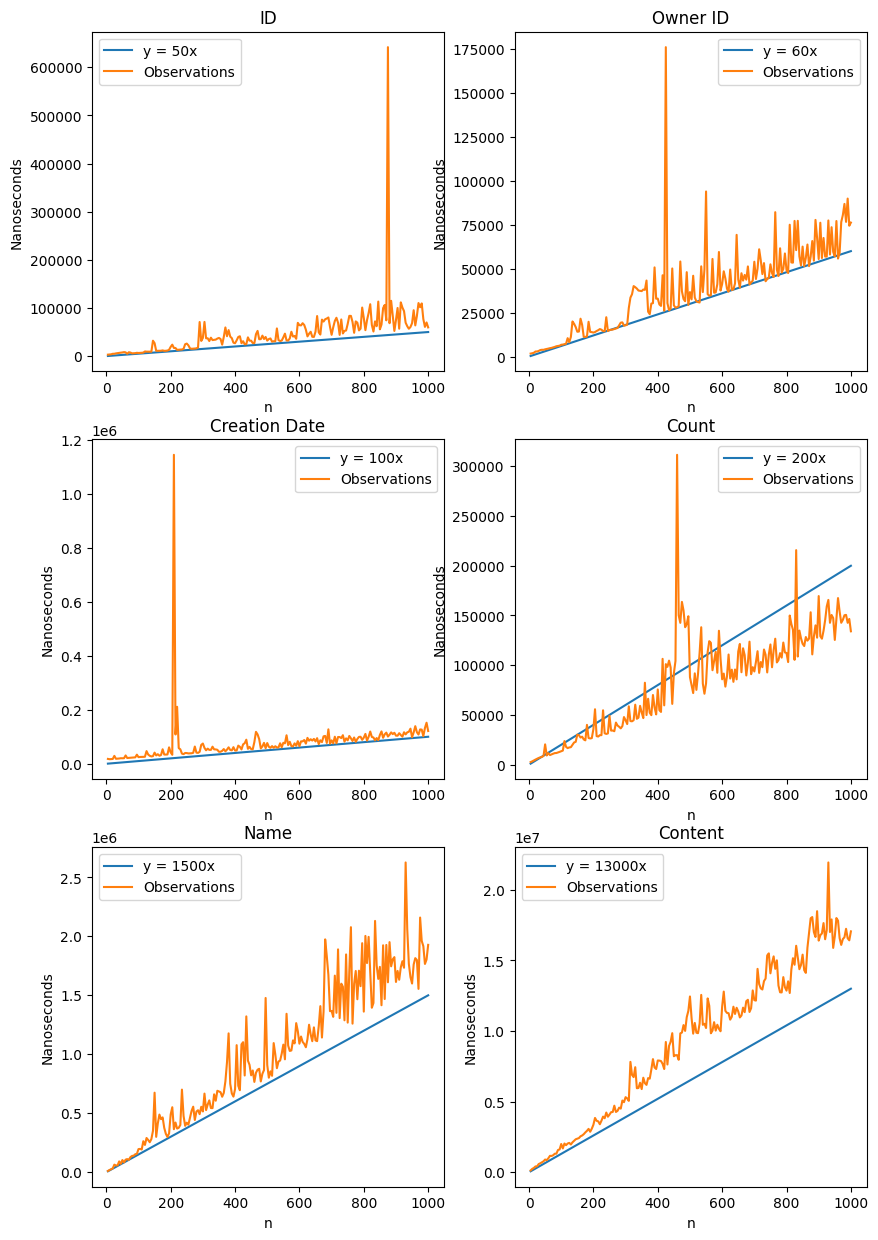

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(10,15)) # Gráficos para plot

dg_sizes = [dgrid.size for dgrid in sub_datagrids] # Valores de n para os plots
# print(dg_sizes)

# Gráficos da coluna ID
lin_id_exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo

    # Faremos 100 buscas
    for i in range(100):
        dgrid.search("id", 0000, False)

    # O método get_execution_time tira uma média de todos tempos observados até então
    lin_id_exec_times.append(get_execution_time("search"))
# print(exec_times)

y = [i*50 for i in dg_sizes]
axes[0][0].plot(dg_sizes, y, label = "y = 50x")
axes[0][0].plot(dg_sizes, lin_id_exec_times, label = "Observations")
axes[0][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][0].set_title("ID")
axes[0][0].legend()

# Gráficos da coluna Owner ID
lin_own_exec_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo

    for i in range(100):
        dgrid.search("owner_id", "ABC123")

    lin_own_exec_times.append(get_execution_time("search"))

y = [i*60 for i in dg_sizes]
axes[0][1].plot(dg_sizes, y, label = "y = 60x")
axes[0][1].plot(dg_sizes, lin_own_exec_times, label = "Observations")
axes[0][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][1].set_title("Owner ID")
axes[0][1].legend()

# Gráficos da coluna Creation Date
lin_date_exec_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo

    for i in range(100):
        dgrid.search("creation_date", ("2013/01/01 00:00:00", "2013/12/31 23:59:59"))

    lin_date_exec_times.append(get_execution_time("search"))

y = [i*100 for i in dg_sizes]
axes[1][0].plot(dg_sizes, y, label = "y = 100x")
axes[1][0].plot(dg_sizes, lin_date_exec_times, label = "Observations")
axes[1][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][0].set_title("Creation Date")
axes[1][0].legend()

# Gráficos da coluna Count
lin_count_exec_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo

    for i in range(100):
        dgrid.search("count", (0, 1+i))

    lin_count_exec_times.append(get_execution_time("search"))

y = [i*200 for i in dg_sizes]
axes[1][1].plot(dg_sizes, y, label = "y = 200x")
axes[1][1].plot(dg_sizes, lin_count_exec_times, label = "Observations")
axes[1][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][1].set_title("Count")
axes[1][1].legend()

# Gráficos da coluna Name
exec_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo

    for i in range(100):
        dgrid.search("name", "abcd")

    exec_times.append(get_execution_time("search"))

y = [i*1500 for i in dg_sizes]
axes[2][0].plot(dg_sizes, y, label = "y = 1500x")
axes[2][0].plot(dg_sizes, exec_times, label = "Observations")
axes[2][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[2][0].set_title("Name")
axes[2][0].legend()

# Gráficos da coluna Content
exec_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo

    for i in range(100):
        dgrid.search("content", "stepsister")

    exec_times.append(get_execution_time("search"))

y = [i*13000 for i in dg_sizes]
axes[2][1].plot(dg_sizes, y, label = "y = 13000x")
axes[2][1].plot(dg_sizes, exec_times, label = "Observations")
axes[2][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[2][1].set_title("Content")
axes[2][1].legend()


Apesar da oscilação devido os diferentes resultados das buscas e devido estarmos usando sub-DataGrids derivados de um mesmo DataGrid original, podemos observar que de fato os tempos de busca seguem uma tendência linear.  

Como já era esperado, observa-se que os algoritmos com as maiores constantes se tratam dos algoritmos de busca em strings, pois estes não possuem opção de otimização e precisam, necessariamente, percorrer todas as $n$ strings do DataGrid do início ao fim. Isso também é observado na constante da coluna Content ser expressivamente maior do que a constante da coluna Name, pois a primeira possui strings expressivamente maiores.

Também podemos observar a tendência assintótica dos algoritmos de busca binária, que possuem complexidade $O(\log n)$. Para isso, primeiro devemos ordenar cada coluna, para só então realizar a busca.

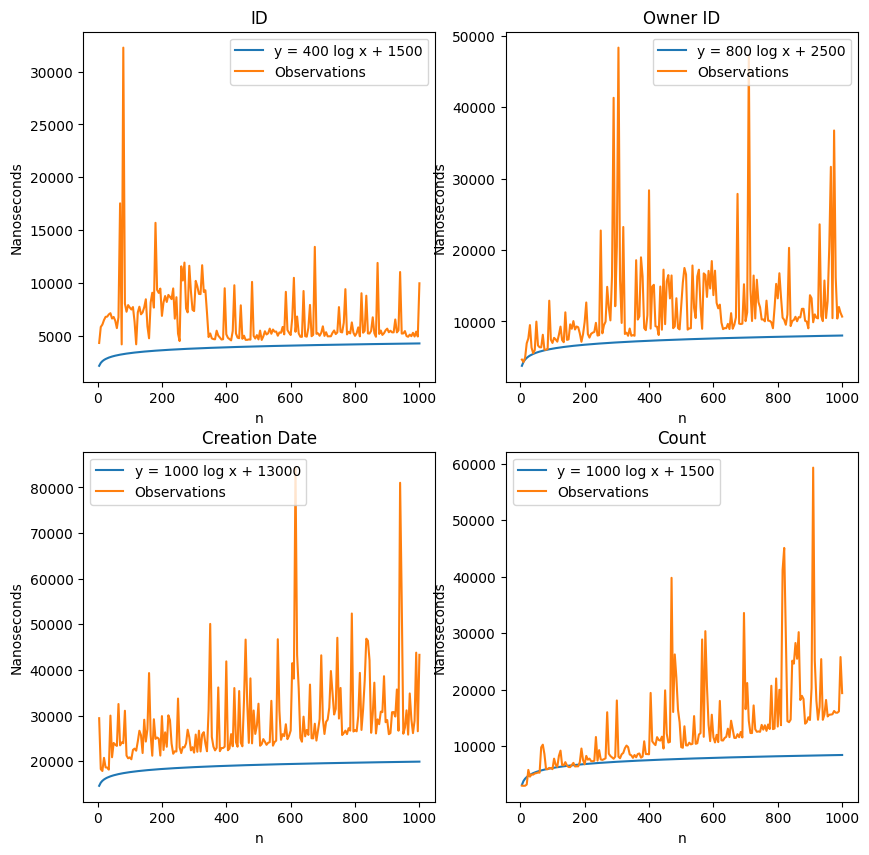

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) # Gráficos para plot

# Gráficos da coluna ID
bin_id_exec_times = []
id_sort_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids:
    reset_execution_times() # reseta os marcadores de tempo
    dgrid.sort("id") # ordena o datagrid
    id_sort_times.append(get_execution_time("sort"))
    # Faremos 100 buscas
    for i in range(100):
        dgrid.search("id", 0000)

    # O método get_execution_time tira uma média de todos tempos observados até então
    bin_id_exec_times.append(get_execution_time("search"))
# print(exec_times)

y = [400*math.log(i) + 1500 for i in dg_sizes]
axes[0][0].plot(dg_sizes, y, label = "y = 400 log x + 1500")
axes[0][0].plot(dg_sizes, bin_id_exec_times, label = "Observations")
axes[0][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][0].set_title("ID")
axes[0][0].legend()

# Gráficos da coluna Owner ID
bin_own_exec_times = []
own_sort_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo
    dgrid.sort("owner_id", strategy = "radix_sort") # ordena o datagrid
    own_sort_times.append(get_execution_time("sort"))

    for i in range(100):
        dgrid.search("owner_id", "AAAAA")

    bin_own_exec_times.append(get_execution_time("search"))

y = [800*math.log(i) + 2500 for i in dg_sizes]
axes[0][1].plot(dg_sizes, y, label = "y = 800 log x + 2500")
axes[0][1].plot(dg_sizes, bin_own_exec_times, label = "Observations")
axes[0][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][1].set_title("Owner ID")
axes[0][1].legend()

# Gráficos da coluna Creation Date
bin_date_exec_times = []
date_sort_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo
    dgrid.sort("creation_date", strategy = "radix_sort") # ordena o datagrid
    date_sort_times.append(get_execution_time("sort"))

    for i in range(100):
        dgrid.search("creation_date", ("2013/01/01 00:00:00", "2013/12/31 23:59:59"))

    bin_date_exec_times.append(get_execution_time("search"))

y = [1000*math.log(i) + 13000 for i in dg_sizes]
axes[1][0].plot(dg_sizes, y, label = "y = 1000 log x + 13000")
axes[1][0].plot(dg_sizes, bin_date_exec_times, label = "Observations")
axes[1][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][0].set_title("Creation Date")
axes[1][0].legend()

# Gráficos da coluna Count
bin_count_exec_times = []
count_sort_times = []

for dgrid in sub_datagrids:
    reset_execution_times() # reseta o marcador de tempo
    dgrid.sort("count") # ordena o datagrid
    count_sort_times.append(get_execution_time("sort"))

    for i in range(100):
        dgrid.search("count", (0, 10))

    bin_count_exec_times.append(get_execution_time("search"))

y = [1000*math.log(i) + 1500 for i in dg_sizes]
axes[1][1].plot(dg_sizes, y, label = "y = 1000 log x + 1500")
axes[1][1].plot(dg_sizes, bin_count_exec_times, label = "Observations")
axes[1][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][1].set_title("Count")
axes[1][1].legend()

Apesar da oscilação dos dados, a busca binária acompanha o gráfico $\log n$, e podemos observar que a ordem de grandeza do eixo de tempo é expressivamente menor que na busca linear.

Para explicitar essa diferença, vamos comparar esses 4 algoritmos de busca binária com suas contrapartes lineares. Temos que levar em consideração que enquanto a busca linear tem complexidade assintótica maior, a busca binária tem como pré-requisito que o DataGrid esteja ordenado, portanto precisamos incluir o tempo de ordenação na análise.

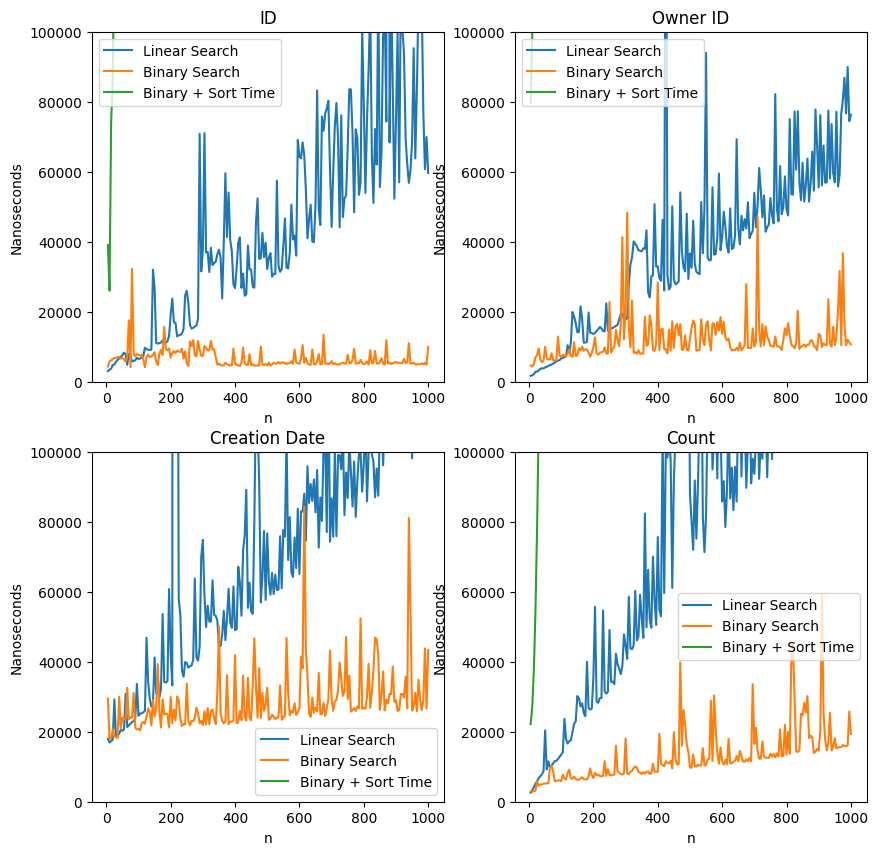

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) # Gráficos para plot

for ax in axes.flat:
    ax.set_ylim([0, 100000])

id_bin_sort = [bin_id_exec_times[i] + id_sort_times[i] for i in range(len(bin_id_exec_times))]
axes[0][0].plot(dg_sizes, lin_id_exec_times, label = "Linear Search")
axes[0][0].plot(dg_sizes, bin_id_exec_times, label = "Binary Search")
axes[0][0].plot(dg_sizes, id_bin_sort, label = "Binary + Sort Time")
axes[0][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][0].set_title("ID")
axes[0][0].legend()

own_bin_sort = [bin_own_exec_times[i] + own_sort_times[i] for i in range(len(bin_own_exec_times))]
axes[0][1].plot(dg_sizes, lin_own_exec_times, label = "Linear Search")
axes[0][1].plot(dg_sizes, bin_own_exec_times, label = "Binary Search")
axes[0][1].plot(dg_sizes, own_bin_sort, label = "Binary + Sort Time")
axes[0][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][1].set_title("Owner ID")
axes[0][1].legend()

date_bin_sort = [bin_date_exec_times[i] + date_sort_times[i] for i in range(len(bin_date_exec_times))]
axes[1][0].plot(dg_sizes, lin_date_exec_times, label = "Linear Search")
axes[1][0].plot(dg_sizes, bin_date_exec_times, label = "Binary Search")
axes[1][0].plot(dg_sizes, date_bin_sort, label = "Binary + Sort Time")
axes[1][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][0].set_title("Creation Date")
axes[1][0].legend()

count_bin_sort = [bin_count_exec_times[i] + count_sort_times[i] for i in range(len(bin_count_exec_times))]
axes[1][1].plot(dg_sizes, lin_count_exec_times, label = "Linear Search")
axes[1][1].plot(dg_sizes, bin_count_exec_times, label = "Binary Search")
axes[1][1].plot(dg_sizes, count_bin_sort, label = "Binary + Sort Time")
axes[1][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][1].set_title("Count")
axes[1][1].legend()

Apesar da complexidade dos algoritmos não ficar muito clara, é muito fácil perceber a tendência de crescimento de cada caso. 

Como podemos ver, o melhor tempo certamente é da busca binária, mas infelizmente quando analisamos ela somada ao tempo de ordenação, o tempo é tão explosivamente maior que foi necessário cortar o gráfico para sermos capazes de interpretar os dois inferiores. Ainda assim, é possível perceber que no extremo esquerdo da imagem, o gráfico sempre explode para cima, e isso é apenas uma consequência óbvia do fato de que não existe algoritmo de ordenação aplicável nesses casos que chegue perto da complexidade de uma seleção (tanto que foram utilizados os mais otimizados e ainda assim a diferença é expressiva). 

Em alguns casos, podemos observar ainda que no início, com poucos elementos, o algoritmo de busca linear consegue se sair melhor que a busca binária. Isso se dá devido às diferenças de constantes entre eles. Apesar disso, em nenhum caso a busca binária demora muito para alcançar e superar a busca linear em velocidade.

---

### Comparação de Ordenação

Comecemos testando o funcionamento de cada tipo de sort:

#### Insertion Sort

In [40]:
print("Ordenando em ordem decrescente a coluna ID, usando a estratégia Insertion Sort, não otimizada.")

dg.DataGrid.sort(small_datagrid, column="id", direction="desc", strategy="insertion_sort", optimized = False)
dg.DataGrid.show(small_datagrid, 0,4)

print("Ordenando em ordem crescente a coluna ID, usando a estratégia Insertion Sort, otimizada.")

dg.DataGrid.sort(small_datagrid, column="id", direction="asc", strategy="insertion_sort", optimized = True)
dg.DataGrid.show(small_datagrid, 0,4)


Ordenando em ordem decrescente a coluna ID, usando a estratégia Insertion Sort, não otimizada.

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
16     | 37IcL    | 2010/11/26 15:13:03 | 39        | JBgIqIcrnMAJJDxHCO   | phage rankwise spectral Methody celibatist chylocyst broomy syntheme Spirochaeta oppositive cank scollop barcelona Rodger vaccinia taurophobe fustily Rumper Hu originate
15     | 4A158    | 2005/03/21 11:37:00 | 53        | PYrvZYQk             | protologist idiothermy photaesthesis dhanush unreachable plantlike oocyst grazer keratogenous remission borocalcite Polypi dichrooscope paraschematic adore fretwork claustration excisor metrolymphangitis subchorionic
14     | el1X4    | 2018/07/14 12:27:09 | 29        | SUsgKePvVfYSTlRjd    | antisaloon inflect seismometrograph vibratiunculation witnessdom superstrata noncitizen parentheticalness uncompacted steno Falcidian subrange cocreditor discardment zinnwaldite tearableness relocator 

#### Selection Sort

In [41]:
print("Ordenando em ordem decrescente a coluna Count, usando a estratégia Selection Sort, não otimizada.")

dg.DataGrid.sort(small_datagrid, column="count", direction="desc", strategy="selection_sort", optimized = False)
dg.DataGrid.show(small_datagrid, 0,4)

print("Ordenando em ordem crescente a coluna Count, usando a estratégia Selection Sort, otimizada.")

dg.DataGrid.sort(small_datagrid, column="count", direction="asc", strategy="selection_sort", optimized = True)
dg.DataGrid.show(small_datagrid, 0,4)

Ordenando em ordem decrescente a coluna Count, usando a estratégia Selection Sort, não otimizada.

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
12     | fwlGl    | 2011/09/15 15:29:20 | 92        | cBTJY                | unhaltered skiagraphic transdialect act Sicana hogwort zantewood archmarshal affenspalte sickless ditto tone wheelroad Cetid argenteum signatory barth midstory revealedly wentletrap
2      | poFAL    | 2003/06/15 09:11:46 | 90        | HrGWyNbyPNoRbsWz     | coelonavigation counteragitation lawny Ariidae leacher branch echitamine wishfulness reelingly conceited inapperceptible exegetist willowworm footman semifossilized unconformity boree moujik garnish unfilial
4      | AOi87    | 2000/11/21 05:15:07 | 79        | eSOOj                | besmirch rouncy seromembranous Clupea branchiomere Didelphia aviarist nowadays slipshoddiness dishonest inglenook gaumy accent brilliancy nonstimulant pirogue statutable quiveringly bivalvular Pu

#### Merge Sort

In [42]:
print("Ordenando em ordem decrescente a coluna Timestamp, usando a estratégia Merge Sort.")

dg.DataGrid.sort(small_datagrid, column="timestamp", direction="desc", strategy="merge_sort")
dg.DataGrid.show(small_datagrid, 0,4)

print("Ordenando em ordem crescente a coluna Timestamp, usando a estratégia Merge Sort.")

dg.DataGrid.sort(small_datagrid, column="timestamp", direction="asc", strategy="merge_sort")
dg.DataGrid.show(small_datagrid, 0,4)

Ordenando em ordem decrescente a coluna Timestamp, usando a estratégia Merge Sort.

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
6      | LuMng    | 2019/06/28 15:22:29 | 65        | jagYgwvOdDGCkVUZSJ   | soullike tenebrous Sarcopsylla enterogram Lepidosauria iriscope silicochloroform Sioux kerykeion floccus mesoblastemic inkindle cricotracheotomy upbrace decoration upon friskingly Endophyllum magnetooptics reckla
14     | el1X4    | 2018/07/14 12:27:09 | 29        | SUsgKePvVfYSTlRjd    | antisaloon inflect seismometrograph vibratiunculation witnessdom superstrata noncitizen parentheticalness uncompacted steno Falcidian subrange cocreditor discardment zinnwaldite tearableness relocator chlorimeter exchangeably spectator
9      | qOLNR    | 2015/12/10 14:38:31 | 51        | HSqq                 | multinodate pentatriacontane unmodelled tiddy inexist acerbity unfeatured sunfast sufficeable myxolipoma Cotylophora hydroxylamine submuscular disusage

#### Quick Sort

In [43]:
print("Ordenando em ordem decrescente a coluna Count, usando a estratégia Quick Sort.")

dg.DataGrid.sort(small_datagrid, column="count", direction="desc", strategy="quick_sort")
dg.DataGrid.show(small_datagrid, 0,4)

print("Ordenando em ordem crescente a coluna Count, usando a estratégia Quick Sort.")

dg.DataGrid.sort(small_datagrid, column="count", direction="asc", strategy="quick_sort")
dg.DataGrid.show(small_datagrid, 0,4)

Ordenando em ordem decrescente a coluna Count, usando a estratégia Quick Sort.

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
12     | fwlGl    | 2011/09/15 15:29:20 | 92        | cBTJY                | unhaltered skiagraphic transdialect act Sicana hogwort zantewood archmarshal affenspalte sickless ditto tone wheelroad Cetid argenteum signatory barth midstory revealedly wentletrap
2      | poFAL    | 2003/06/15 09:11:46 | 90        | HrGWyNbyPNoRbsWz     | coelonavigation counteragitation lawny Ariidae leacher branch echitamine wishfulness reelingly conceited inapperceptible exegetist willowworm footman semifossilized unconformity boree moujik garnish unfilial
4      | AOi87    | 2000/11/21 05:15:07 | 79        | eSOOj                | besmirch rouncy seromembranous Clupea branchiomere Didelphia aviarist nowadays slipshoddiness dishonest inglenook gaumy accent brilliancy nonstimulant pirogue statutable quiveringly bivalvular Publilian
13     | gq

#### Heap Sort

In [44]:
print("Ordenando em ordem decrescente a coluna ID, usando a estratégia Heap Sort.")

dg.DataGrid.sort(small_datagrid, column="id", direction="desc", strategy="heap_sort")
dg.DataGrid.show(small_datagrid, 0,4)

print("Ordenando em ordem crescente a coluna ID, usando a estratégia Heap Sort.")

dg.DataGrid.sort(small_datagrid, column="id", direction="asc", strategy="heap_sort")
dg.DataGrid.show(small_datagrid, 0,4)

Ordenando em ordem decrescente a coluna ID, usando a estratégia Heap Sort.

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
16     | 37IcL    | 2010/11/26 15:13:03 | 39        | JBgIqIcrnMAJJDxHCO   | phage rankwise spectral Methody celibatist chylocyst broomy syntheme Spirochaeta oppositive cank scollop barcelona Rodger vaccinia taurophobe fustily Rumper Hu originate
15     | 4A158    | 2005/03/21 11:37:00 | 53        | PYrvZYQk             | protologist idiothermy photaesthesis dhanush unreachable plantlike oocyst grazer keratogenous remission borocalcite Polypi dichrooscope paraschematic adore fretwork claustration excisor metrolymphangitis subchorionic
14     | el1X4    | 2018/07/14 12:27:09 | 29        | SUsgKePvVfYSTlRjd    | antisaloon inflect seismometrograph vibratiunculation witnessdom superstrata noncitizen parentheticalness uncompacted steno Falcidian subrange cocreditor discardment zinnwaldite tearableness relocator chlorimeter exchange

#### Radix Sort

In [45]:
print("Ordenando em ordem decrescente a coluna Content, usando a estratégia Radix Sort.")

dg.DataGrid.sort(small_datagrid, column="content", direction="desc", strategy="radix_sort")
dg.DataGrid.show(small_datagrid, 0,4)

print("Ordenando em ordem crescente a coluna Owner id, usando a estratégia Radix Sort.")

dg.DataGrid.sort(small_datagrid, column="owner_id", direction="asc", strategy="radix_sort")
dg.DataGrid.show(small_datagrid, 0,4)

Ordenando em ordem decrescente a coluna Content, usando a estratégia Radix Sort.

ID     | Owner ID | Creation Date       | Count     | Name                 | Content
12     | fwlGl    | 2011/09/15 15:29:20 | 92        | cBTJY                | unhaltered skiagraphic transdialect act Sicana hogwort zantewood archmarshal affenspalte sickless ditto tone wheelroad Cetid argenteum signatory barth midstory revealedly wentletrap
6      | LuMng    | 2019/06/28 15:22:29 | 65        | jagYgwvOdDGCkVUZSJ   | soullike tenebrous Sarcopsylla enterogram Lepidosauria iriscope silicochloroform Sioux kerykeion floccus mesoblastemic inkindle cricotracheotomy upbrace decoration upon friskingly Endophyllum magnetooptics reckla
13     | gqnm9    | 2015/03/12 11:03:16 | 78        | GlNwRBbuWD           | smouse undispatched angrite chemotic ununderstanding classicism Delphinus uniquantic rape massive hydatogenic rebatement neckmold anounou achroglobin prosilient upstaff sanctificate photolithographer nondepo

### Insertion Sort e Selection Sort
Os algoritmos Insertion Sort e Selection Sort têm complexidade $O(n^2)$. Podemos analisar sua complexidade em comparação com o gráfico base:


[Text(0, 0.5, 'Milliseconds'), Text(0.5, 0, 'n')]

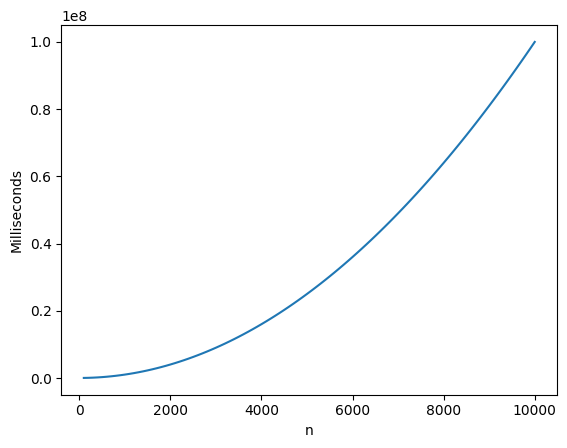

In [46]:
x = range(100, 10001, 100)
y = [i**2 for i in x]
ax = sns.lineplot(x = x, y = y, )
ax.set(ylabel = "Milliseconds", xlabel = "n")

#### Merge Sort, Quick Sort e Heap Sort

Os algoritmos Merge Sort, Quick Sort, Heap Sort têm complexidade $O (n \log n)$. Podemos analisar sua complexidade em comparação com o gráfico base:

[Text(0, 0.5, 'Milliseconds'), Text(0.5, 0, 'n')]

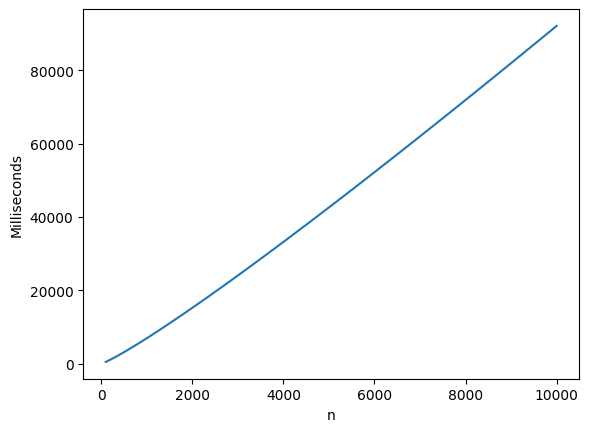

In [47]:
x = range(100, 10001, 100)
y = [i * math.log(i) for i in x]
ax = sns.lineplot(x = x, y = y, )
ax.set(ylabel = "Milliseconds", xlabel = "n")

#### Radix Sort

O algoritmo Radix Sort diferente dos anterios tem complexidade linear $O (n(k+1))$ no pior caso, onde todas palavras são iguais. Podemos analisar sua complexidade em comparação com o gráfico base:

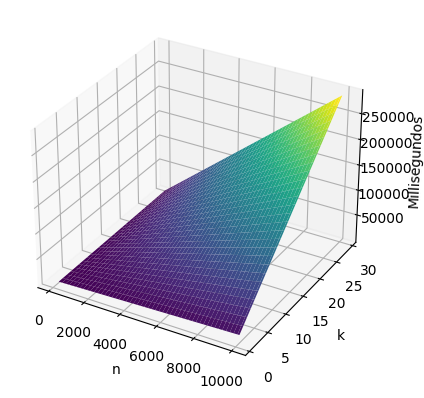

In [48]:
k_values = range(1,30,1)
x_values = range(100, 10001, 100)
x, k = np.meshgrid(x_values, k_values)
y = x*k
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, k, y, cmap='viridis')

# Adiciona rótulos aos eixos
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.set_zlabel('Millisegundos')

# Mostra o gráfico
plt.show()


Ou fixando k=20:

[Text(0, 0.5, 'Milliseconds'), Text(0.5, 0, 'n')]

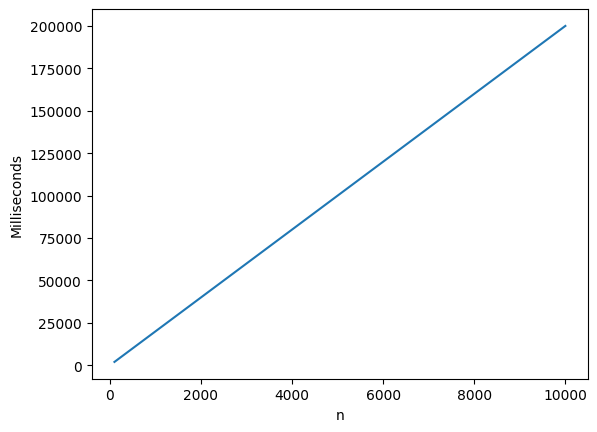

In [49]:
x = range(100, 10001, 100)
y = [i * 20 for i in x]
ax = sns.lineplot(x = x, y = y, )
ax.set(ylabel = "Milliseconds", xlabel = "n")

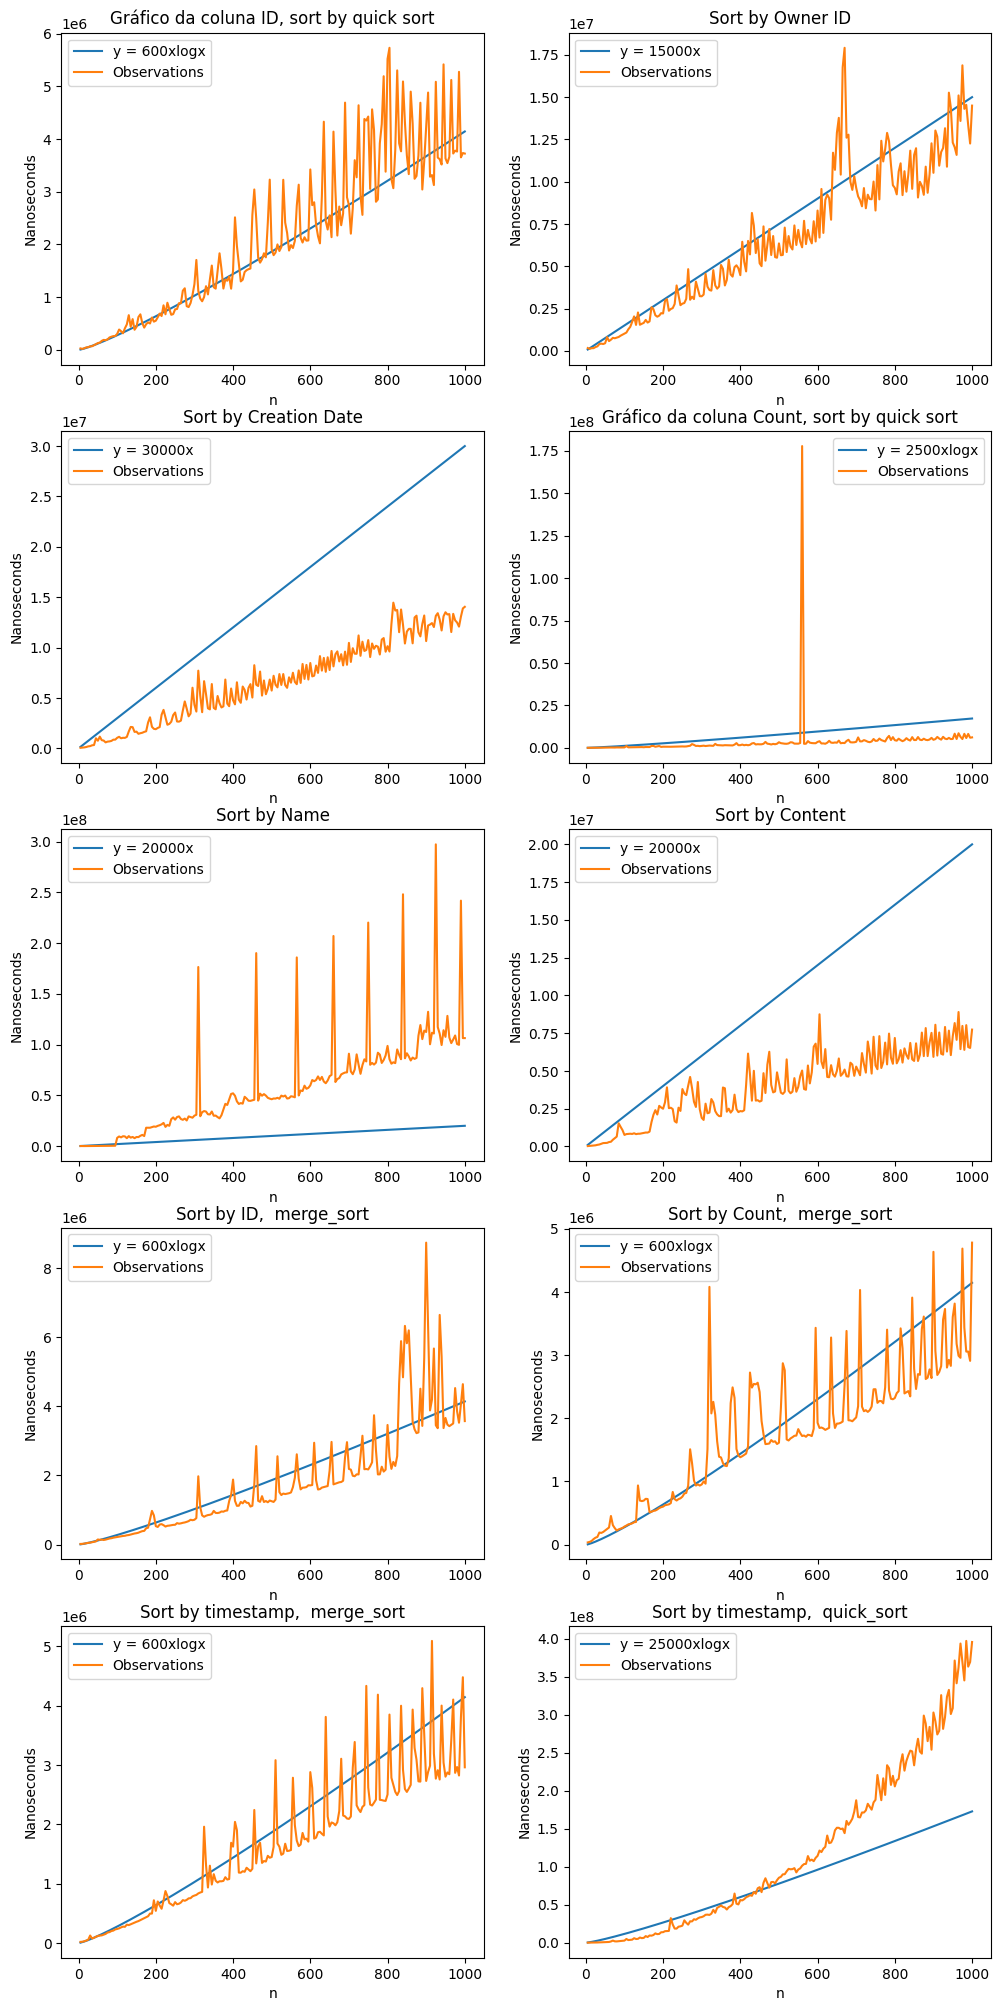

In [56]:
fig, axes = plt.subplots(5, 2, figsize=(12,25)) # Gráficos para plot

dg_sizes = [dgrid.size for dgrid in sub_datagrids] # Valores de n para os plots
# print(dg_sizes)
# Gráficos da coluna ID 
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="id", direction="asc", strategy="quick_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*(600)*math.log(i) for i in dg_sizes[:400]]
axes[0][0].plot(dg_sizes, y, label = "y = 600xlogx")
axes[0][0].plot(dg_sizes, exec_times, label = "Observations")
axes[0][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][0].set_title("Gráfico da coluna ID, sort by quick sort")
axes[0][0].legend()

# Gráficos da coluna Owner ID
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo
    dgrid.sort(column="owner_id", direction="asc", strategy="radix_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*15000 for i in dg_sizes[:400]]
axes[0][1].plot(dg_sizes, y, label = "y = 15000x")
axes[0][1].plot(dg_sizes, exec_times, label = "Observations")
axes[0][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[0][1].set_title("Sort by Owner ID")
axes[0][1].legend()

# Gráficos da coluna Creation Date
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="creation_date", direction="asc", strategy="radix_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*30000 for i in dg_sizes[:400]]
axes[1][0].plot(dg_sizes, y, label = "y = 30000x")
axes[1][0].plot(dg_sizes, exec_times, label = "Observations")
axes[1][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][0].set_title("Sort by Creation Date")
axes[1][0].legend()


# Gráficos da coluna Count
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="count", direction="asc", strategy="quick_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*(2500)*math.log(i) for i in dg_sizes[:400]]
axes[1][1].plot(dg_sizes, y, label = "y = 2500xlogx")
axes[1][1].plot(dg_sizes, exec_times, label = "Observations")
axes[1][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[1][1].set_title("Gráfico da coluna Count, sort by quick sort")
axes[1][1].legend()


# Gráficos da coluna Name
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="name", direction="asc", strategy="radix_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*20000 for i in dg_sizes[:400]]
axes[2][0].plot(dg_sizes, y, label = "y = 20000x")
axes[2][0].plot(dg_sizes, exec_times, label = "Observations")
axes[2][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[2][0].set_title("Sort by Name")
axes[2][0].legend()



# Gráficos da coluna Content
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="content", direction="asc", strategy="radix_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*20000 for i in dg_sizes[:400]]
axes[2][1].plot(dg_sizes, y, label = "y = 20000x")
axes[2][1].plot(dg_sizes, exec_times, label = "Observations")
axes[2][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[2][1].set_title("Sort by Content")
axes[2][1].legend()

# Gráficos da coluna ID
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="id", direction="asc", strategy="merge_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*(600)*math.log(i) for i in dg_sizes[:400]]
axes[3][0].plot(dg_sizes, y, label = "y = 600xlogx")
axes[3][0].plot(dg_sizes, exec_times, label = "Observations")
axes[3][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[3][0].set_title("Sort by ID,  merge_sort")
axes[3][0].legend()

# Gráficos da coluna Count
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="count", direction="asc", strategy="merge_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*(600)*math.log(i) for i in dg_sizes[:400]]
axes[3][1].plot(dg_sizes, y, label = "y = 600xlogx")
axes[3][1].plot(dg_sizes, exec_times, label = "Observations")
axes[3][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[3][1].set_title("Sort by Count,  merge_sort")
axes[3][1].legend()

# Gráficos da coluna TimeStamp
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="timestamp", direction="asc", strategy="merge_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*(600)*math.log(i) for i in dg_sizes[:400]]
axes[4][0].plot(dg_sizes, y, label = "y = 600xlogx")
axes[4][0].plot(dg_sizes, exec_times, label = "Observations")
axes[4][0].set(ylabel = "Nanoseconds", xlabel = "n")
axes[4][0].set_title("Sort by timestamp,  merge_sort")
axes[4][0].legend()

# Gráficos da coluna TimeStamp
exec_times = []

# Para cada tamanho de datagrid
for dgrid in sub_datagrids[:400]:
    reset_execution_times() # reseta o marcador de tempo

    dgrid.sort(column="timestamp", direction="asc", strategy="quick_sort", optimized = True)

    # O método get_execution_time tira uma média de todos tempos observados até então
    exec_times.append(get_execution_time("sort"))
# print(exec_times)

y = [i*(25000)*math.log(i) for i in dg_sizes[:400]]
axes[4][1].plot(dg_sizes, y, label = "y = 25000xlogx")
axes[4][1].plot(dg_sizes, exec_times, label = "Observations")
axes[4][1].set(ylabel = "Nanoseconds", xlabel = "n")
axes[4][1].set_title("Sort by timestamp,  quick_sort")
axes[4][1].legend()



Apesar da oscilação estamos usando sub-DataGrids derivados de um mesmo DataGrid original, podemos observar que de fato os tempos de sort seguem uma tendência quase linear.

Nos métodos numéricos foram analisadas 5 abordagens e as que se destacaram foram a ordenação por merge sort e quick sort, podemos ver pelos gráficos acima que não há um majoritariamente melhor sobre o outro. Já para ordenação de strings utilizamos radix sort, pois é o único método para esse tipo de dado. Por último, na coluna Creation_data podemos utilizar duas abordagens, o radix sort ou a coluna oculta que adicionamos que utiliza a lógica de timestamp, para assim utilizar merge sort ou quick sort. Podemos ver que o desempenho de ordenar a data por merge sort é melhor.



---

### Comparação de Seleção

Nesse bloco, testaremos e compararemos as abordagens implementadas no método `select_count(i, j)`. Porém, como dito anteriormente, compararemos apenas as abrodagens que tomam como referência uma lista não ordenada já que o caso base (quando o datagrid está ordenado conforme a coluna `count`) é trivial.

Antes de analisar os resultados, é importante ressaltar que o desempenho de qualquer solução para o problema de seleção varia conforme a escolha dos índices $i$ e $j$. Isso acontece pois, dependendo dos valores de $i$ e $j$, o número de elementos que precisam ser selecionados, removidos, percorridos ou até mesmo ordenados do datagrid pode variar. Além disso, para algumas das abordagens, o posicionamento do intervalo $[i, j]$ no datagrid (estando mais próximos do início ou do final da lista) também pode influenciar no desempenho final. Contudo, sabemos que esse tipo de observação é inerente à grande parte dos algoritmos e, tendo isso em mente, tentaremos gerar resultados que sejam representativos do desempenho geral de cada abordagem a partir da escolha aleatória de $i$ e $j$, além de um maior número de repetições de cada teste, a fim de obter um resultado que tenda à média real do tempo de execução de cada abordagem.

Tendo feitas as devidas ponderações, vamos observar os resultados, comparando o desempenho médio de cada uma das 3 abordagens para amostras de tamanho $2^n$, com $n$ variando de 1 a 9, repetindo cada teste 1000 vezes:

**Obs**: Para agilizar, vou apenas importar os resultados já obtidos e plotá-los. Caso queira executar os testes novamente, basta acessar o arquivo `analise_select_count.ipynb`, escolher os parâmetros dos testes e executar as suas células

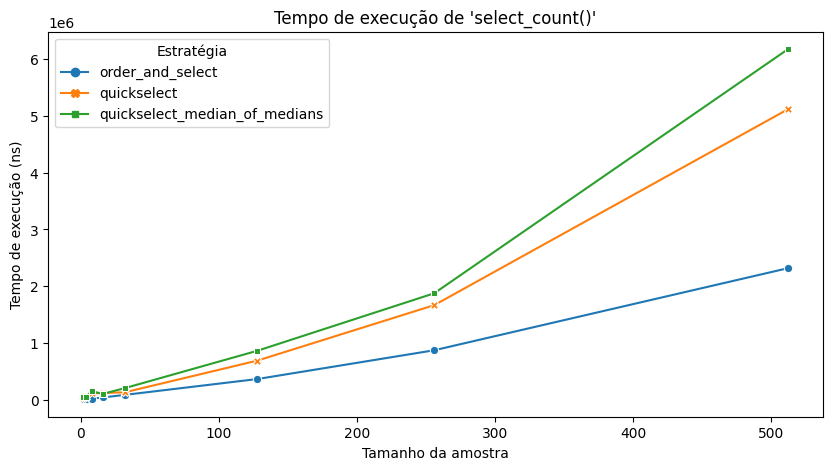

In [ ]:
import pandas as pd

results = pd.read_csv("./results_select_count/results_select_count_2e9x1000.csv")

plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="Tamanho da amostra", y="Tempo de execução (ns)", hue="Estratégia", style="Estratégia", markers=True, dashes=False)
plt.title("Tempo de execução de 'select_count()'")
plt.show()

Como podemos ver, a abordagem `order_and_select`, por mais que seja a mais trivial, é a que apresentou os melhores resultados. Isso pode ser facilmente explicado pelo fato de que, apesar de ter complexidade $O(n\log n)$, o restante do algoritmo consiste de um acesso ao intervalo especificado do datagrid, que possui complexidade $O(j-i)$. Ou seja, o gargalo do algoritmo é a ordenação, que é feita apenas uma vez.

Já os outros métodos, por mais que operem sobre premissas de divisão e conquista, particionamentos constantes e escolha aleatória ou orientada de pivôs, também depender da mesma ordenação para poder retornar os resultados em ordem crescente. A depender da proporção do intervalo $[j-i]$ em relação ao total de elementos do datagrid, os 3 algoritmos podem ordenar uma lista gigante, mas com os quickselects ainda tendo um overhead devido à estrutrutura do algoritmo.

Agora comparando os dois quickselects, podemos ver que, em média, a mediana das medianas não melhora os resultados. Mas como isso acontece se a estrutura dos algoritmos é a mesma, só varia na escolha do pivô? Para vermos com mais detalhes, vamos expandir a nossa análise para amostras maiores, permitindo opinar sobre o comportamento assintotico dessas abordagens

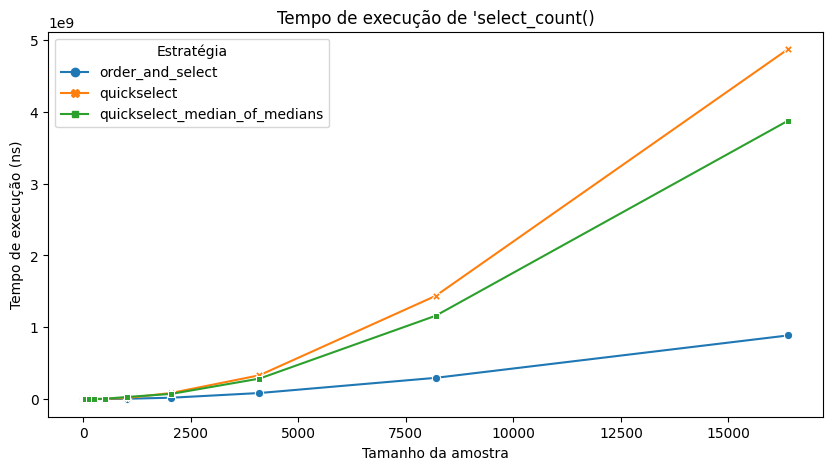

In [ ]:
results = pd.read_csv("./results_select_count/results_select_count_2e14.csv")

plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="Tamanho da amostra", y="Tempo de execução (ns)", hue="Estratégia", style="Estratégia", markers=True, dashes=False)
plt.title("Tempo de execução de 'select_count()")
plt.show()

Já nesse teste, vemos que a mediana das medianas influenciou na melhoria do quickselect mas, empiricamente, foi observada muita inconstância nos resultados.

No caso médio, ambos os algoritmos realizam as mesmas tarefas, com a diferença de que o quickselect com mediana das medianas realiza mais comparações para selecionar o pivô. Como apresentado em sala, a grande melhoria apresentada pelo algoritmo da mediana das medianas está no pior caso, onde o pivô selecionado é sempre o maior ou o menor elemento do datagrid. Contudo, como esse ensaio foi feito aleatorizando os parâmetros de seleção, não foi possível observar esse comportamento.

Para isso, vamos observar especificamente o pior caso: listas ordenadas ou "quase" ordenadas. Para simular esse caso, vamos ordenar a lista de forma crescente antes de cada teste mas, ao invés de selecionar os elementos entre os índices $i$ e $j$, vamos forçar a aplicação desses 3 métodos novamente. Os resultados são mostrados a seguir

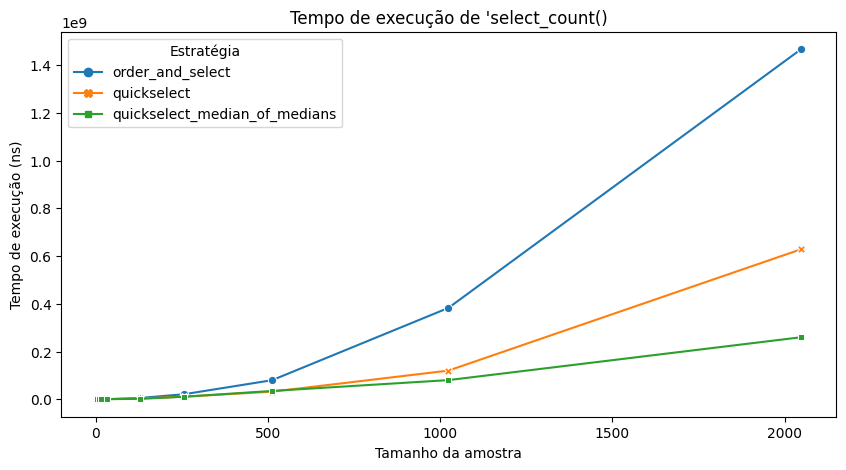

In [ ]:
results = pd.read_csv("./results_select_count/results_select_count_PiorCaso2e11x100.csv")

plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="Tamanho da amostra", y="Tempo de execução (ns)", hue="Estratégia", style="Estratégia", markers=True, dashes=False)
plt.title("Tempo de execução de 'select_count()")
plt.show()

Coincidentemente, por estarmos utilizando o algoritmo de `quick_sort` para todas as análises, tanto o `quickselect` quando o `quicksort` possuem o mesmo pior caso, o qual foi abordado no teste descrito acima.

É nesse contexto que podemos avaliar que a estratégia ingênua de ordenar e selecionar nem sempre é a mais eficiente. Nesse caso, o `quicksort` assume complexidade $O(n^2)$ para quaisquer índices $i$ e $j$, majorando todas as demais abordagens.

Na contramão, o `quickselect`, aplicando divisão e conquista, mesmo se utilizando do algoritmo de `quicksort` para ordenar os resultados ao final, opera listas cada vez menores, o que faz com que sua complexidade $O(n^2)$ reflita em resultados melhores, a depender da escolha de $i$ e $j$ (que determinam a complexidade da ordenação que ocorre ao fim do algoritmo).

Por fim, o grande destaque desse exemplo é que a mediana das medianas, mesmo com seu overhead de comparações e sub-ordenações, consegue melhorar o desempenho do `quickselect` no pior caso, conforme a expectativa. Isso se deve à escolha mais inteligente do pivô, que evita que o algoritmo de `quickselect` assuma complexidade $O(n^2)$. Contudo, ainda é difícil mensurar o ganho real dessa abordagem devido aos demais fatores que influenciam no desempenho do algoritmo, como a escolha de $i$ e $j$, a divisão e conquista realizada sobre o datagrid e a ordenação ao final do algoritmo.

Como conclusão desse estudo de comparação de abordagens, atribuirei ao atributo `strategy` o valor padrão `order_and_select`. Mesmo não sendo a mais eficiente no pior caso, ess abordagem ingênua atingiu os melhores resultados no caso médio. Contudo, é importante ressaltar que, para que essa abordagem seja a mais eficiente, é necessário que o datagrid não esteja ordenado conforme a coluna `count`, o que pode não ser verdadeiro em alguns casos. No nosso caso, na ausência de métricas que determinem o quão "quase ordenado" está o datagrid, não é possível determinar se a abordagem `order_and_select` é a mais eficiente ou não e, portanto, tomarei o caso médio como referência para essa escolha.

---

### 4. Conclusão

Nesse trabalho, foram implementados e analisados algoritmos de busca, ordenação e seleção, conforme o problema apresentado e os requisitos elicitados. 
Esse relatório sintetiza todo o trabalho feito em equipe acerca do desenvolvimento do datagrid, dos nossos resultados, das nossas ressalvas e observações e, por fim, das nossas conclusões.

Para cada um dos algoritmos, diferentes abordagens foram implementadas para buscar soluções mais eficientes e, para cada algoritmo, foram realizados testes para comparar o desempenho de cada uma das abordagens e, assim, determinar qual delas seria a mais adequada para o problema em questão ou para cada um dos subproblemas ligados à ordenação prévia do datagrid, número de entradas, etc.

Para os algoritmos de busca, não havia muito a se fazer a respeito das abordagens, pois só conhecemos os algoritmos de busa linear e busca binária. O ponto principal no trabalho foi implementar uma aplicação flexível dessas duas abordagens, e analisá-las em conjunto. Ao final da análise, foi aprendido que, apesar da busca binária ter uma complexidade assintótica significativamente melhor que a linear, sua dependência da ordenação da lista a torna muito situacional. Por isso, só vale a pena utilizá-la nos casos em que a lista já estava previamente ordenada por outros motivos. Caso o usuário queira realizar uma busca no DataGrid desordenado, ainda é muito melhor realizar a busca linear ao invés de ordenar o DataGrid para aplicar a busca binária.

Para os algoritmos de ordenação, foram analisadas 5 abordagens e as que se destacaram foram a ordenação por merge sort e quick sort, sendo o quick sort escolhido como padrão para a função Sort. Nos métodos numéricos foram analisadas 5 abordagens e as que se destacaram foram a ordenação por merge sort e quick sort, podemos ver pelos gráficos acima que não há um majoritariamente melhor sobre o outro. Já para ordenação de strings utilizamos radix sort, pois é o único método para esse tipo de dado. Por último, na coluna Creation_data podemos utilizar duas abordagens, o radix sort ou a coluna oculta que adicionamos que utiliza a lógica de timestamp, para assim utilizar merge sort ou quick sort. Podemos ver que o desempenho de ordenar a data por merge sort é melhor.

Para os algoritmos de seleção, foram analisadas 3 abordagens e, surpreendentemente, a que melhor performou no caso médio (randomizando os índices $i$ e $j$ para datagrid não ordenados) foi a estratégia mais ingênua: ordene o datagrid e execute o caso base (selecione diretamente o intervalo dado um datagrid previamente ordenado). As abordagens com QuickSelect e Mediana das Medianas apenas performaram melhor que a abordagem descrita anteriormente no pior caso (onde o datagrid está ordenado conforme a coluna `count`). Contudo, como não há métricas que determinem o quão "quase ordenado" está o datagrid, não é possível determinar se a abordagem `order_and_select` é a mais eficiente ou não e, portanto, tomarei o caso médio como referência para essa escolha. Além disso, foi possível ver a influência de overheads no desempenho das funções (como o número de comparações e de sub-ordenações, quando se adiciona o algoritmo de mediana das medianas ao quickselect) e como isso pode influenciar no desempenho final do algoritmo para casos em que esse overhead é maior do que a melhoria proposta pela abordagem.